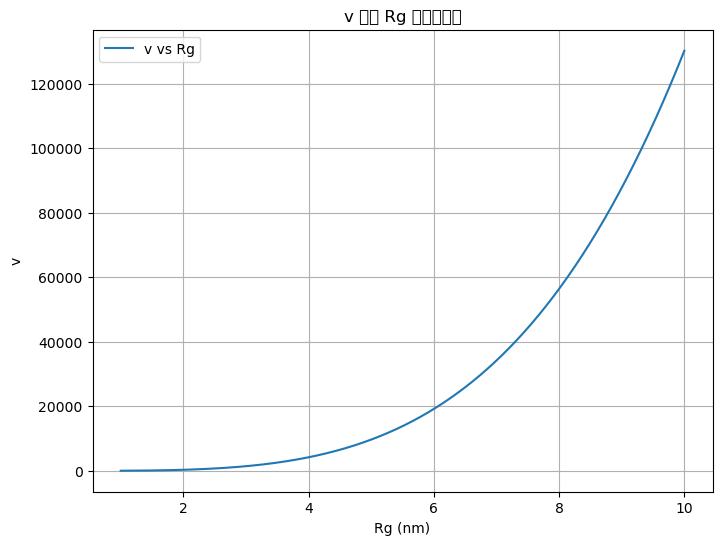

In [14]:
# Plot rg vs. parav

import numpy as np
import matplotlib.pyplot as plt

# 常数
Psi = 0.21
NA = 6.022e23        # 阿伏伽德罗常数 (mol^-1)
M = 40000            # 分子量 (g/mol)
c = 9.98                # 浓度 (g/L)

# 单位转换
Rg_nm = np.linspace(1, 10, 1000)    # Rg 从 1 nm 到 100 nm，共 1000 个点
Rg = Rg_nm * 1e-9                    # 将 Rg 转换为米
M_kg = M / 1000                      # 将 M 转换为 kg/mol
c_kg_m3 = c                          # c 已经是 kg/m^3

# 计算 A2
A2 = 4 * np.pi**(1.5) * NA * (Rg**3) / (M_kg**2) * Psi

# 计算 X
X = 16 * A2 * c * M

# 为避免除以零，对 X 中的零值进行处理
X[X == 0] = 1e-10

# 计算 v
term1 = (9 * X - 2 + (2 * np.log(1 + X)) / X) / 8
exponent = 0.25 * ((1 / X) + (1 - 1 / X**2) * np.log(1 + X))
v = term1 * np.exp(exponent)

# 绘制图像
plt.figure(figsize=(8, 6))
plt.plot(Rg_nm, v, label='v vs Rg')
plt.xlabel('Rg (nm)')
plt.ylabel('v')
plt.title('v 关于 Rg 的函数图像')
plt.legend()
plt.grid(True)
plt.show()


In [51]:
# calculate parav

# 导入必要的数学库
import math

# 已知参数
Psi = 0.21                   # 黏度系数
NA = 6.022e23                # 阿伏伽德罗常数 (mol^-1)
M = 41300                    # 分子量 (g/mol)
Rg = 12.2416e-9                    # 均方根半径 (m)，5 nm 转换为米
c = 1*9.98e3                   # 浓度 (g/m^3)，9.98 g/L 转换为 g/m^3

# 计算 A2
# 公式：A2 = 4 * π^(3/2) * NA * (Rg^3) / (M^2) * Psi
pi_term = 4 * math.pi**(1.5)    # 计算 4 * π^(3/2)
Rg_cubed = Rg ** 3              # 计算 Rg 的立方
M_squared = M ** 2              # 计算 M 的平方
A2 = pi_term * NA * Rg_cubed / M_squared * Psi   # 计算 A2

# 计算 X
# 公式：X = 16 * A2 * c * M
X = 16 * A2 * c * M

# 计算指数部分
# 计算 ln(1 + X)
ln_1_plus_X = math.log(1 + X)

# 计算指数的指数部分 E
inverse_X = 1 / X
inverse_X_squared = 1 / X**2
E = 0.25 * (inverse_X + (1 - inverse_X_squared) * ln_1_plus_X)

# 计算指数值 exp(E)
exp_E = math.exp(E)

# 计算括号内的值 S
numerator = 9 * X - 2 + (2 * ln_1_plus_X) / X
S = numerator

# 计算最终的 v 值
v = (1 / 8) * S * exp_E

# 输出结果
print(f"计算得到的 v 值为：{v:.4f}")


计算得到的 v 值为：48.1557
